In [4]:
import sys
import os
if '..' not in sys.path:
    sys.path.append('..')
if 'extern/Portrait-Segmentation' not in sys.path:
    sys.path.append('extern/Portrait-Segmentation')
%load_ext autoreload
%autoreload 2

# Import Data

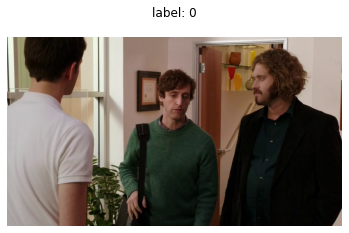

In [52]:
from conv_recognition.dataset import UcoDataset
import matplotlib.pyplot as plt

data = UcoDataset('../data/ucolaeodb', 'sv01')
img, label = data[0]

plt.imshow(img.permute(1,2,0))
plt.title(f'label: {label}')
plt.axis('off')
plt.show()

# Face Detection

In [60]:
from face_detection import RetinaFace
detector = RetinaFace(0)

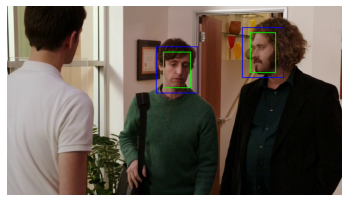

2 found


In [62]:
import cv2 
from copy import copy


img_numpy = copy(img.permute(1,2,0).cpu().numpy())
faces = detector(img_numpy)

face_tensors = []
for box, landmarks, score in faces:
    if score < 0.9:
        continue
    x_min = int(box[0])
    y_min = int(box[1])
    x_max = int(box[2])
    y_max = int(box[3])

    bbox_width = abs(x_max - x_min)
    bbox_height = abs(y_max - y_min)

    x_min2 = max(0, x_min-int(0.2*bbox_height))
    y_min2 = max(0, y_min-int(0.2*bbox_width))
    x_max2 = x_max+int(0.2*bbox_height)
    y_max2 = y_max+int(0.2*bbox_width)

    face_tensors.append(img[:, y_min:y_max, x_min:x_max])

    cv2.rectangle(img_numpy, (x_min, y_min), (x_max, y_max), (0,255,0), 2)
    cv2.rectangle(img_numpy, (x_min2, y_min2), (x_max2, y_max2), (0,0,255), 2)

plt.imshow(img_numpy)
plt.axis('off')
plt.show()
print(f'{len(face_tensors)} found')

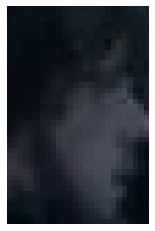

In [24]:
plt.imshow(face_tensors[1].permute(1,2,0))
plt.axis('off')
plt.show()